<a href="https://colab.research.google.com/github/cyruskimani/Autolib-Dataset-Sampling/blob/main/Week_4_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing for Bluecars in Autolib Electric Car SharingDataset.

# Defining the Question.

## Problem Statement.

The objective is to investigate whether there is a difference in usage of Bluecars on Mondays and Fridays.

To investigate whether there is a difference in activity at the most prefered postal codes.

## Hypothesis.

**Null and Alternative Hypothesis.**

* The null hypothesis is that the number of Bluecars used on Monday is equal to the number of Bluecars used on Friday.

* Null Hypothesis: m1 = m2

>> *Where m1 is the mean of cars used on Monday while m2 is the mean of cars used on Friday*


* The Alternative hypothesis is that the number of Bluecars used on Monday is not equal to the number of Bluecars used on Friday

* Alternative Hypothesis: m1 != m2


# Loading the Dataset.

In [ ]:
# Importing Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the Glossary file for label descriptions of the Autolib Dataset.
Description = pd.read_excel("http://bit.ly/DSCoreAutolibDatasetGlossary")
Description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [ ]:
# Loading the Autolib Dataset.
df = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [ ]:
# Previewing the top of the dataset
df.head(2)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22


In [ ]:
# Previewing the bottom of the dataset
df.tail(2)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


# Information About the Dataset.

In [ ]:
# Determining the shape of the dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (16085, 13)


In [ ]:
# Identifying unique values in each column of the dataset
print("Unique values in each column")
df.nunique()

Unique values in each column


Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [ ]:
# Checking for column names and their respective data types
print("Column names:", df.columns)
print("Datatypes in each column:", df.info())

Column names: Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   U

In [ ]:
# Description of the dataset
df.describe(include = 'all')

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085,16085.000000,16085.000000,16085,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
unique,NaN,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2/3/2018,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,11544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,88791.293876,NaN,1431.330619,2.969599,NaN,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,NaN,33.212050,2.008378,NaN,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,NaN,1174.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,NaN,1440.000000,3.000000,NaN,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,NaN,1440.000000,5.000000,NaN,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000


In [ ]:
# Information on Bluecar columns

print('Basic Statistics for Bluecar Taken:')
print(df['BlueCars_taken_sum'].describe())
print('Statistics for Bluecar Returned:')
print(df['BlueCars_returned_sum'].describe())

Basic Statistics for Bluecar Taken:
count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: BlueCars_taken_sum, dtype: float64
Statistics for Bluecar Returned:
count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: BlueCars_returned_sum, dtype: float64


## Insights on the Dataset.

* The shape of the dataset implies 16085 rows and 13 columns.

* The dataset contains columns which are unrelated to the Bluecar. These columns need to be dropped.

* The column names need to be edited to have uniformity and simplicity of labels.

* The date column is of object datatype. This needs to be changed to have a datetime datatype.

# Data Cleaning.

## Labels, Duplicates and Null Values.

In [ ]:
# Dropping unnecessary columns.
bc = df.drop(columns=['Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 
                      'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum', 'n_daily_data_points'])
print("Shape of dataset",bc.shape)
bc.head()

Shape of dataset (16085, 6)


,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,138,139
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117


In [ ]:
# Changing column names
bc.rename(columns={'Postal code':'postal_code','dayOfWeek':'day_of_week','BlueCars_taken_sum':'bluecars_taken',
                    'BlueCars_returned_sum': 'bluecars_returned'}, inplace=True)
bc.head()

,postal_code,date,day_of_week,day_type,bluecars_taken,bluecars_returned
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,138,139
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117


In [ ]:
# Checking for duplicates and dropping them
bc = bc.drop_duplicates()
bc.shape

(16085, 6)

*No duplicates were found.*

In [ ]:
# Checking for null values
bc.isnull().count()

postal_code          16085
date                 16085
day_of_week          16085
day_type             16085
bluecars_taken       16085
bluecars_returned    16085
dtype: int64

*No null values were found*

## Outliers.

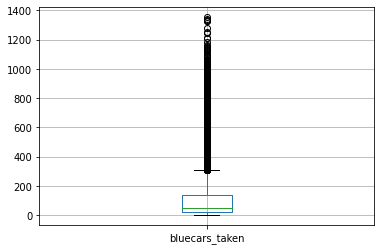

In [ ]:
# Outliers in Bluecars taken. 
boxplot = bc.boxplot(column=['bluecars_taken'])

In [ ]:
#Removing the outliers from Bluecars taken using IQR

max_threshold = bc['bluecars_taken'].quantile(0.75)
print(max_threshold)
min_threshold = bc['bluecars_taken'].quantile(0.25)
print(min_threshold)
bc1 = bc[bc['bluecars_taken']<= max_threshold]
bc1 = bc[bc['bluecars_taken']> min_threshold]
print(bc1.shape)

135.0
20.0
(11910, 6)


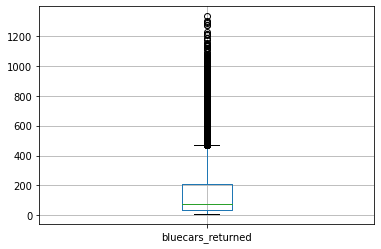

In [ ]:
# Outliers in Bluecars returned.
boxplot = bc1.boxplot(column=['bluecars_returned'])

In [ ]:
#Removing the outliers from Bluecars returned using IQR

max_threshold = bc['bluecars_returned'].quantile(0.75)
print(max_threshold)
min_threshold = bc['bluecars_returned'].quantile(0.25)
print(min_threshold)
bc2 = bc1[bc1['bluecars_returned']<= max_threshold]
bc2 = bc1[bc1['bluecars_returned']> min_threshold]
print(bc2.shape)

135.0
20.0
(11619, 6)


# Data Sampling.

* Stratified sampling will be used to create samples which wiil be used to for the hypothesis.
* Simple Random sampling will then be applied to the strtified samples for the different days being studied.
* The sample size was determined using a sampling size formula accessed at:http://www.raosoft.com/samplesize.html
* Sample size is 372

In [ ]:
# Take one sample one from Mondays.
mon = bc2[bc2['day_of_week'] == 0]
mon.reset_index(drop=True, inplace=True)
mon.head()

,postal_code,date,day_of_week,day_type,bluecars_taken,bluecars_returned
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/8/2018,0,weekday,84,83
2,75001,1/15/2018,0,weekday,107,107
3,75001,1/22/2018,0,weekday,123,116
4,75001,1/29/2018,0,weekday,83,81


In [ ]:
# Take another sample from Fridays.
fri = bc2[bc2['day_of_week'] == 4]
fri.reset_index(drop=True, inplace=True)
fri.head()

,postal_code,date,day_of_week,day_type,bluecars_taken,bluecars_returned
0,75001,1/5/2018,4,weekday,114,117
1,75001,1/12/2018,4,weekday,126,127
2,75001,1/19/2018,4,weekday,130,130
3,75001,1/26/2018,4,weekday,145,146
4,75001,2/2/2018,4,weekday,146,147


In [ ]:
# Import random sampling libraries

import random  
from random import sample

In [ ]:
# Random sampling for Mondays.
mon_sample = mon.sample(n=372,replace="False")
mon_sample.shape

(372, 6)

In [ ]:
# Random sampling for Fridays.
fri_sample = fri.sample(n=372,replace="False")
fri_sample.shape

(372, 6)

# Exploratory Data Analysis.

## Univariate Analysis.

In [ ]:
# Determining measures of central tendancy for Mondays dataframe

mon_df = mon_sample[['bluecars_taken', 'bluecars_returned']]
print("Monday Mean=",mon_df.mean())
print("Monday Mode=",mon_df.mode())
print("Monday Median=",mon_df.median())

Monday Mean= bluecars_taken       150.430108
bluecars_returned    150.190860
dtype: float64
Monday Mode=    bluecars_taken  bluecars_returned
0              25                 25
Monday Median= bluecars_taken       76.0
bluecars_returned    77.5
dtype: float64


In [ ]:
# Determine Maximum and Minimum usage.
print('Monday Maximum usage')
print(mon_df.max())
print('Monday Minimum usage')
print(mon_df.min())

Monday Maximum usage
bluecars_taken       840
bluecars_returned    834
dtype: int64
Monday Minimum usage
bluecars_taken       22
bluecars_returned    21
dtype: int64


In [ ]:
# Determine Quartiles.
quantiles_mon = mon_df.quantile([0.25,0.5,0.75])
print(quantiles_mon)

      bluecars_taken  bluecars_returned
0.25           39.75              40.00
0.50           76.00              77.50
0.75          201.50             198.25


In [ ]:
# Determine Skewness.
print('Monday Skewness')
print(mon_df.skew())

Monday Skewness
bluecars_taken       1.797599
bluecars_returned    1.843962
dtype: float64


In [ ]:
# Determine Kurtosis.
print('Monday Kurtosis')
print(mon_df.kurtosis())

Monday Kurtosis
bluecars_taken       2.930210
bluecars_returned    3.141755
dtype: float64


### **Monday Sample Insights.**

* There was a difference of Bluecars taken (840) and those returned (834).
* Both Bluecars taken and Bluecars returned were skewed to the left,

In [ ]:
# Determining measures of central tendancy for Fridays dataframe

fri_df = fri_sample[['bluecars_taken', 'bluecars_returned']]
print("Friday Mean=",fri_df.mean())
print("Friday Mode=",fri_df.mode())
print("Friday Median=",fri_df.median())

Friday Mean= bluecars_taken       162.715054
bluecars_returned    161.193548
dtype: float64
Friday Mode=    bluecars_taken  bluecars_returned
0              23               34.0
1              28                NaN
2              38                NaN
3              44                NaN
Friday Median= bluecars_taken       72.0
bluecars_returned    73.0
dtype: float64


In [ ]:
# Determine Maximum and Minimum usage.
print('Friday Maximum usage')
print(fri_df.max())
print('Friday Minimum usage')
print(fri_df.min())

Friday Maximum usage
bluecars_taken       936
bluecars_returned    865
dtype: int64
Friday Minimum usage
bluecars_taken       21
bluecars_returned    21
dtype: int64


In [ ]:
# Determine Quartiles for Friday.
quantiles_fri = fri_df.quantile([0.25,0.5,0.75])
print(quantiles_fri)

      bluecars_taken  bluecars_returned
0.25            41.0               39.0
0.50            72.0               73.0
0.75           207.0              210.5


In [ ]:
# Determine Skewness For Friday.
print('Friday Skewness')
print(fri_df.skew())

Friday Skewness
bluecars_taken       1.815764
bluecars_returned    1.803234
dtype: float64


In [ ]:
# Determine Kurtosis for Friday.
print('Friday Kurtosis')
print(fri_df.kurtosis())

Friday Kurtosis
bluecars_taken       2.849855
bluecars_returned    2.728452
dtype: float64


### **Friday Sample Insights.**

* There was a larger difference of Bluecars taken (936) and those returned (865).
* More Bluecars taken on Friday were not returned.
* Both Bluecars taken and Bluecars returned were skewed to the right.

### **Visualizations for Univariate Analysis.**


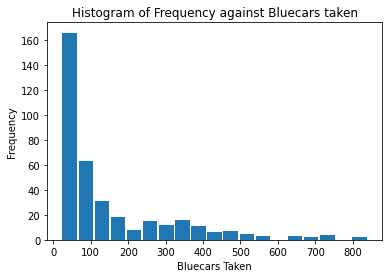

In [ ]:
#Plottinga histogram for Bluecars taken on Monday
Bluecars_taken = mon_df['bluecars_taken']

plt.hist(Bluecars_taken, bins='auto', histtype='bar', rwidth=0.9)
plt.xlabel('Bluecars Taken')
plt.ylabel('Frequency')
plt.title('Histogram of Frequency against Bluecars taken')
plt.show()

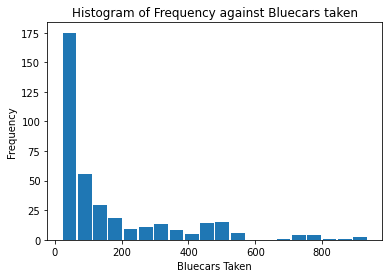

In [ ]:
#Plottinga histogram for Bluecars taken on Friday
Bluecars_taken = fri_df['bluecars_taken']
plt.hist(Bluecars_taken, bins='auto', histtype='bar', rwidth=0.9)
plt.xlabel('Bluecars Taken')
plt.ylabel('Frequency')
plt.title('Histogram of Frequency against Bluecars taken')
plt.show()

### **Conclusion.**

* There was more activity on Friday as the weekend approached than on Monday, which would be considerd to mean that Bluecars were used over the weekend than during weekdays.
* The frequency of Bluecars taken did not have a normal distribution for both Monday and Friday.

## Bivariate Analysis.

### Scatter Plot.

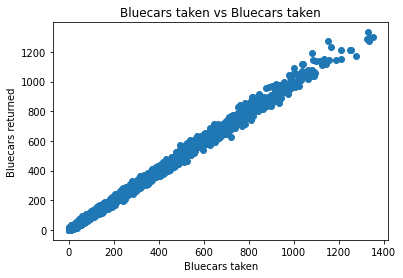

In [ ]:
# Scatter plot for Bluecars taken and Bluecars returned.
plt.scatter(bc["bluecars_taken"] , bc["bluecars_returned"])
plt.title('Bluecars taken vs Bluecars taken')
plt.xlabel('Bluecars taken')
plt.ylabel('Bluecars returned')
plt.show()

### Correlation.

In [ ]:
# Relationship between Bluecars taken and Bluecars returned on Mondays
biv_mon= mon_df[['bluecars_taken', 'bluecars_returned']]
biv_mon.reset_index(drop=True, inplace= True)
biv_mon.head()

,bluecars_taken,bluecars_returned
0,360,376
1,23,31
2,87,87
3,540,605
4,63,66


In [ ]:
# Correlation for Monday
corr_mon = biv_mon.dropna().corr()
corr_mon

,bluecars_taken,bluecars_returned
bluecars_taken,1.00000,0.99793
bluecars_returned,0.99793,1.00000


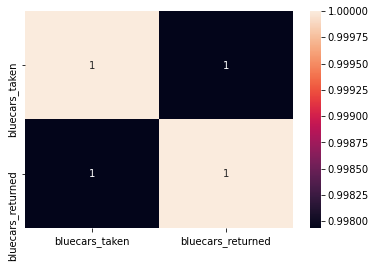

In [ ]:
#plotting a correlation heatmap for Monday
sns.heatmap(corr_mon, xticklabels=corr_mon.columns, yticklabels=corr_mon.columns, annot=True)

*There is a strong correlatioon for Bluecars taken and Bluecars returned on Monday*

In [ ]:
# Relationship between Bluecars taken and Bluecars returned on Fridays
biv_fri= fri_df[['bluecars_taken', 'bluecars_returned']]
biv_fri.reset_index(drop=True, inplace= True)
biv_fri.head()

,bluecars_taken,bluecars_returned
0,34,32
1,38,39
2,461,463
3,32,26
4,40,35


In [ ]:
# Correlation for Friday
corr_fri = biv_fri.dropna().corr()
corr_fri

,bluecars_taken,bluecars_returned
bluecars_taken,1.000000,0.998701
bluecars_returned,0.998701,1.000000


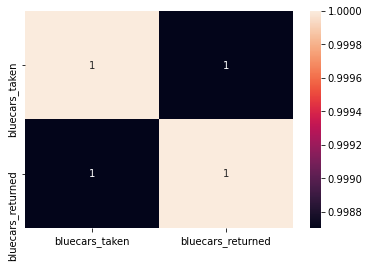

In [ ]:
#plotting a correlation heatmap for Friday
sns.heatmap(corr_fri, xticklabels=corr_fri.columns, yticklabels=corr_fri.columns, annot=True)

### Pair Plot.

*There is a strong correlatioon for Bluecars taken and Bluecars returned on Friday*

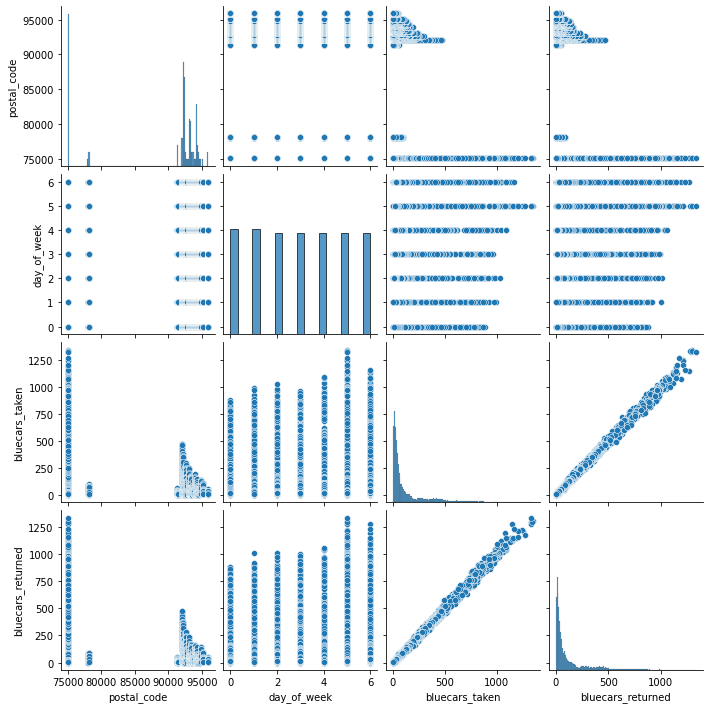

In [ ]:
# Plotting a pairplot for the dataset
sns.pairplot(bc)
plt.show()

### Conclusion.

* There is a strong correlation for Bluecars taken and Bluecars returned for both Monday and Friday.
* There was more activity on Friday as compared to Monday.

# Hypothesis Testing.

## Normality Test.

In [ ]:
mon_sample

In [ ]:
# Using Shapiro wilk test to test if Bluecars taken on Monday are Normaly Distributed

monday = mon_sample['bluecars_taken']

from scipy.stats import shapiro

stat, p = shapiro(monday)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample is Normally Distributed')
else:
	print('Sample is not Normally Distributed')

Statistics=0.761, p=0.000
Sample is not Normally Distributed


In [ ]:
# Using Shapiro wilk test to test if Bluecars taken on Friday are Normaly Distributed

friday = fri_sample['bluecars_taken']

from scipy.stats import shapiro

stat, p = shapiro(friday)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample is Normally Distributed')
else:
	print('Sample is not Normally Distributed')

Statistics=0.730, p=0.000
Sample is not Normally Distributed


The absence of a normal distribution for both Monday and Friday means we cannot use parametric tests. 

**Null and Alternative Hypothesis.**

* The null hypothesis is that the number of Bluecars used on Monday is equal to the number of Bluecars used on Friday.

* Null Hypothesis: m1 = m2
* Alternative Hypothesis: m1 != m2

In [ ]:
# Implementing the solution by performing hypothesis testing
from scipy import stats
from scipy.stats import ttest_ind
stat,p_value = stats.ttest_ind(a=monday.'bluecars_taken',b=friday.'bluecars_taken',equal_var=False)
stat,p_value

if p_value < 0.05:
  print("reject the null hypothesis")
else:
  print("fail to reject null hypothesis")


SyntaxError: ignored

## Wilcox Test.

In [ ]:
#To satisfy the assumptions we will choose another random sample of 50 records from both our datasets
monday1 =monday.sample(n=50,replace="False")
monday1.shape

(50,)

In [ ]:
friday1 =friday.sample(n=50,replace="False")
friday1.shape

(50,)

In [ ]:
# Implementing the solution by performing hypothesis testing
from scipy.stats import wilcoxon
# Comparing the  samples
stat, p = wilcoxon(monday1, friday1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpreting the results
alpha = 0.05
if p > alpha:
    print('Mean of Bluecars taken on Monday and Friday is similar(Fail to reject the Null Hypothesis)')
else:
    print('Mean of Bluecars taken on Monday and Friday is not similar(Reject the Null Hypothesis)')

Statistics=562.000, p=0.466
Mean of Bluecars taken on Monday and Friday is similar(Fail to reject the Null Hypothesis)


## Conclusion.

The usage of Bluecars had a little difference for Mondays and Fridays. The differences are however not significant to necessitate changes in management or operations at Autolib.